### K-Means Clustering

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the datset

In [2]:
import pandas as pd
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:

df.columns=['CustomerID','Gender','Age','Income','Spending']
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Classify similar customers based n income and spending

In [6]:
X=df[['Income','Spending']]
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### plot income and spend

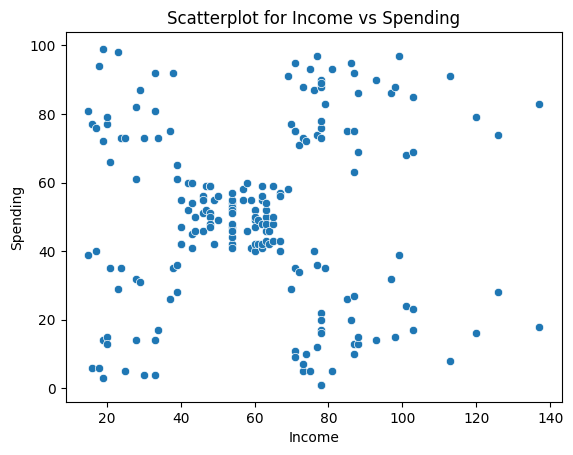

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.scatterplot(data=df,x='Income',y='Spending')
plt.title(f'Scatterplot for Income vs Spending')
plt.show()

### Create a preprocessing pipeline for X

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [9]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                         ('scaler',StandardScaler())])

In [10]:
X_pre=num_pipe.fit_transform(X)
X_pre[0:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [11]:
cols=num_pipe.get_feature_names_out()
cols

array(['Income', 'Spending'], dtype=object)

In [12]:
X_pre=pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### Use Elbow methode to find best K value

In [13]:
%pip install yellowbrick


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Restart and Run all cells

In [14]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans

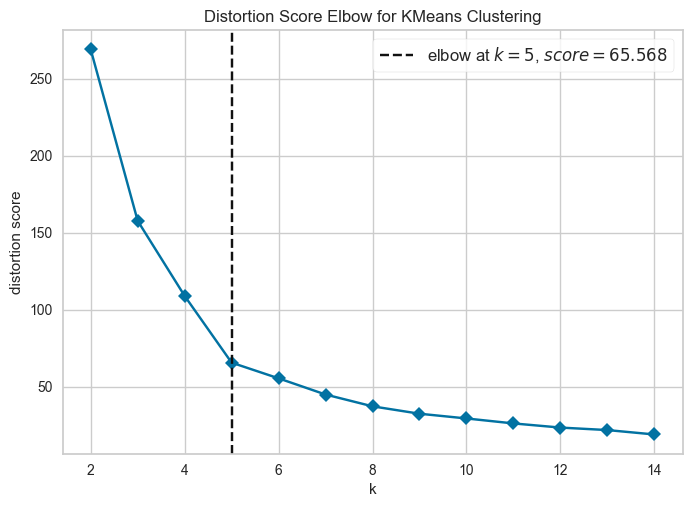

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [15]:
kelbow_visualizer(KMeans(),
                  X_pre,
                  k=(2,15),
                  timings=False)

## K-means algoritham
k=5

In [16]:
model=KMeans(n_clusters=5)
model.fit(X_pre)

KMeans(n_clusters=5)

In [17]:
lb=model.labels_
lb

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [18]:
X['Lable']=lb
X

,Income,Spending,Lable
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


## Centroids

In [19]:
C=X.groupby(by='Lable').mean()
C

,Income,Spending
Lable,,
0,55.296296,49.518519
1,86.538462,82.128205
2,88.200000,17.114286
3,25.727273,79.363636
4,26.304348,20.913043


## Plot Cluster

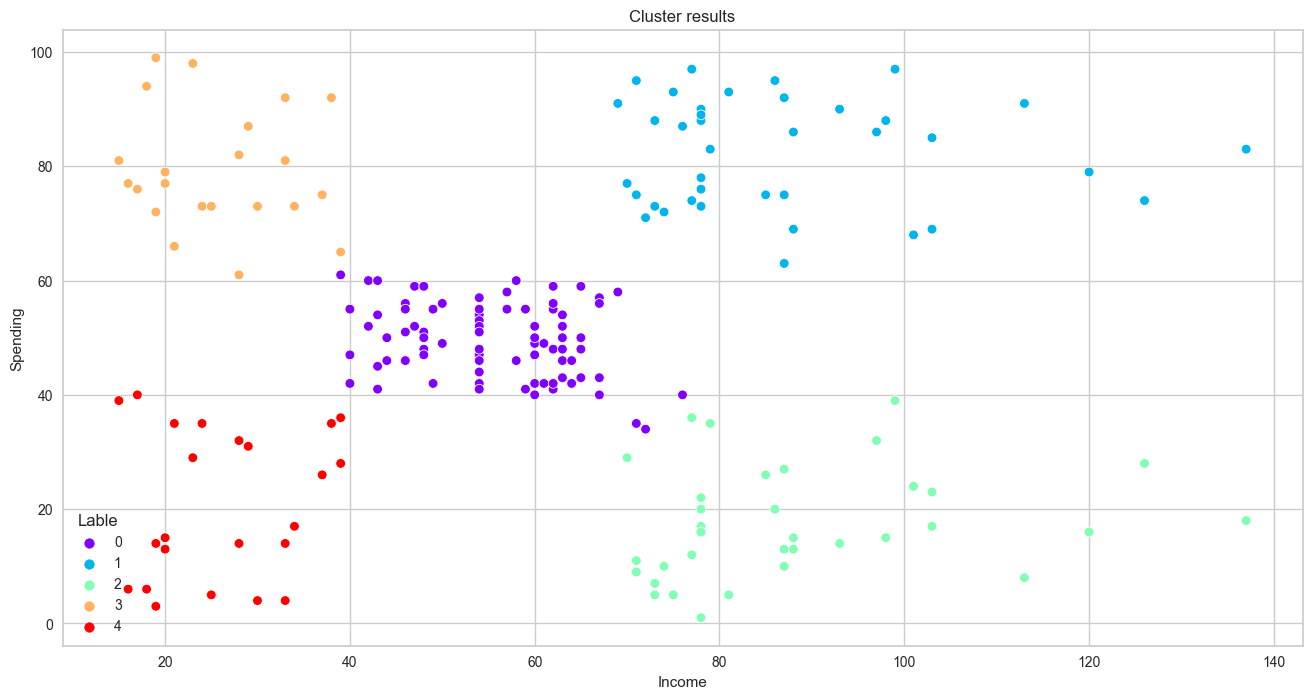

In [20]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=X,x='Income',y='Spending',hue='Lable',palette='rainbow')
plt.title('Cluster results')
plt.show()

In [21]:
X[X['Lable']==0]

,Income,Spending,Lable
43,39,61,0
46,40,55,0
47,40,47,0
48,40,42,0
49,40,42,0
...,...,...,...
121,67,40,0
122,69,58,0
126,71,35,0
132,72,34,0


In [22]:
X[X['Lable']==1]

,Income,Spending,Lable
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1


In [23]:
X[X['Lable']==2]

,Income,Spending,Lable
124,70,29,2
128,71,11,2
130,71,9,2
134,73,5,2
136,73,7,2
138,74,10,2
140,75,5,2
144,77,12,2
146,77,36,2
148,78,22,2


In [24]:
X[X['Lable']==4]

,Income,Spending,Lable
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


## Cluster the customers based on criteria age ,income,gender

In [25]:
X2=df[['Age','Income','Spending']]
X2

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


###  Preprocessing on X2

In [26]:
num_pipe2=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

In [27]:
X2_pre=num_pipe2.fit_transform(X2)
X2_pre[0:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

In [28]:
cols2=num_pipe2.get_feature_names_out()
cols2

array(['Age', 'Income', 'Spending'], dtype=object)

In [29]:
X2_pre=pd.DataFrame(X2_pre,columns=cols2)

In [30]:
X2_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### K-elbow visualizer

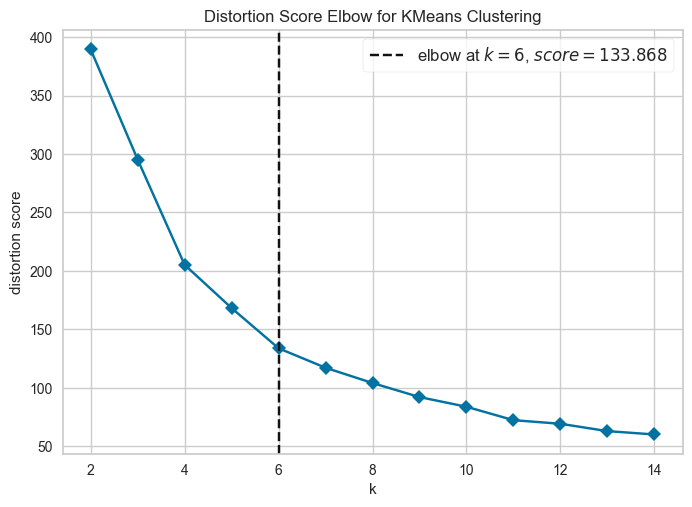

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [31]:
kelbow_visualizer(KMeans(),
                  X2_pre,
                  k=(2,15),
                  timings=False)

### Create Kmeans Model

In [32]:
model2=KMeans(n_clusters=6)
model2.fit(X2_pre)

KMeans(n_clusters=6)

In [33]:
model2.labels_

array([2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 5, 2, 1, 4,
       1, 2, 5, 4, 4, 4, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4,
       5, 5, 4, 4, 5, 5, 5, 5, 5, 4, 5, 4, 4, 5, 5, 4, 5, 5, 4, 5, 5, 4,
       4, 5, 5, 4, 5, 4, 4, 4, 5, 4, 5, 4, 4, 5, 5, 4, 5, 4, 5, 5, 5, 5,
       5, 4, 4, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 0, 4, 0, 3, 0, 3, 0, 3, 0,
       4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 5, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [34]:
X2['Label']=model2.labels_
X2

,Age,Income,Spending,Label
0,19,15,39,2
1,21,15,81,2
2,20,16,6,1
3,23,16,77,2
4,31,17,40,1
...,...,...,...,...
195,35,120,79,0
196,45,126,28,3
197,32,126,74,0
198,32,137,18,3


In [35]:
for i in range(6):
    print(f'Cluster number : {i} \n')
    display(X2[X2['Label']==i])
    print('\n================================================\n')


Cluster number : 0 



,Age,Income,Spending,Label
123,39,69,91,0
125,31,70,77,0
127,40,71,95,0
129,38,71,75,0
131,39,71,75,0
133,31,72,71,0
135,29,73,88,0
137,32,73,73,0
139,35,74,72,0
141,32,75,93,0




Cluster number : 1 



,Age,Income,Spending,Label
2,20,16,6,1
4,31,17,40,1
6,35,18,6,1
8,64,19,3,1
10,67,19,14,1
12,58,20,15,1
14,37,20,13,1
16,35,21,35,1
18,52,23,29,1
20,35,24,35,1




Cluster number : 2 



,Age,Income,Spending,Label
0,19,15,39,2
1,21,15,81,2
3,23,16,77,2
5,22,17,76,2
7,23,18,94,2
9,30,19,72,2
11,35,19,99,2
13,24,20,77,2
15,22,20,79,2
17,20,21,66,2




Cluster number : 3 



,Age,Income,Spending,Label
126,43,71,35,3
128,59,71,11,3
130,47,71,9,3
134,20,73,5,3
136,44,73,7,3
138,19,74,10,3
140,57,75,5,3
144,25,77,12,3
146,48,77,36,3
148,34,78,22,3




Cluster number : 4 



,Age,Income,Spending,Label
43,31,39,61,4
47,27,40,47,4
48,29,40,42,4
49,31,40,42,4
51,33,42,60,4
52,31,43,54,4
58,27,46,51,4
61,19,46,55,4
65,18,48,59,4
68,19,48,59,4




Cluster number : 5 



,Age,Income,Spending,Label
40,65,38,35,5
46,50,40,55,5
50,49,42,52,5
53,59,43,60,5
54,50,43,45,5
55,47,43,41,5
56,51,44,50,5
57,69,44,46,5
59,53,46,46,5
60,70,46,56,5


## Plotly

In [36]:
%pip install plotly nbformat


  Obtaining dependency information for nbformat from https://files.pythonhosted.org/packages/f4/e7/ef30a90b70eba39e675689b9eaaa92530a71d7435ab8f9cae520814e0caf/nbformat-5.9.2-py3-none-any.whl.metadata
  Using cached nbformat-5.9.2-py3-none-any.whl.metadata (3.4 kB)
  Obtaining dependency information for jsonschema>=2.6 from https://files.pythonhosted.org/packages/ce/aa/d1bd0b5ec568a903cc3ebcb6b096ab65c1d971c8a01ca3bf3cf788c3c646/jsonschema-4.19.2-py3-none-any.whl.metadata
  Using cached jsonschema-4.19.2-py3-none-any.whl.metadata (7.9 kB)
  Obtaining dependency information for jsonschema-specifications>=2023.03.6 from https://files.pythonhosted.org/packages/1c/24/83349ac2189cc2435e84da3f69ba3c97314d3c0622628e55171c6798ed80/jsonschema_specifications-2023.7.1-py3-none-any.whl.metadata
  Using cached jsonschema_specifications-2023.7.1-py3-none-any.whl.metadata (2.8 kB)
Using cached nbformat-5.9.2-py3-none-any.whl (77 kB)
Using cached jsonschema-4.19.2-py3-none-any.whl (83 kB)
Using cache


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Restart as run all cells

In [37]:
import plotly.express as px
fig = px.scatter_3d(data_frame=X2, x='Age', y='Income', z='Spending', color='Label')
fig.show()